In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [3]:
train_data = pd.read_csv("/kaggle/input/emnist/emnist-digits-train.csv")
test_data = pd.read_csv("/kaggle/input/emnist/emnist-digits-test.csv")
print(train_data.head())
print(test_data.head())


   8  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.511  0.512  0.513  \
0  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.514  0.515  0.516  0.517  0.518  0.519  0.520  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.472  0.473  0.474  \
0  9    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  7    0    0    0    0    0    0   

In [4]:
train_data.shape


 

(239999, 785)

In [5]:
temp = train_data.iloc[0]
temp.shape

(785,)

In [6]:
 label = temp[0]
digit = np.asarray(temp[1:])
digit = digit.reshape((28, 28))
print(digit)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  20  95 170 115  22   1   0   0   0   0   0
    0   0   0   0   0   1  32  20   0   0]
 [  0   0   0   0   0   0  12 123 231 252 245 154  23   0   0   0   0   0
    0   0   0   0   4  36 200 153   2   0]
 [  0   0   0   0   0  10 195 247 254 255 254 249 191   4   0   0   0   0
    0   0   3  36 202 234 254 217   4   0]
 [  0   0   0   0   3  79 247 254 252 252 254 254 233  22   0   

In [7]:
import matplotlib.pyplot as plt

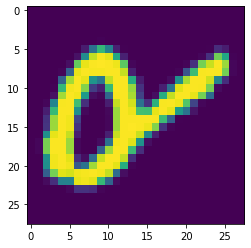

In [8]:
plt.imshow(digit)

In [9]:
digits = []
labels = []
for i in range(train_data.shape[0]):
    row = train_data.iloc[i]
    labels.append(row[0])
    digit = np.asarray(row[1:]).reshape((28, 28, 1))
    digits.append(digit)
digits = np.asarray(digits)
labels = np.asarray(labels)
digits.shape, labels.shape

((239999, 28, 28, 1), (239999,))

In [10]:
tests = []
label = []
for i in range(test_data.shape[0]):
    row = test_data.iloc[i]
    label.append(row[0])
    test = np.asarray(row[1:]).reshape((28, 28, 1))
    tests.append(test)
tests= np.asarray(tests)
label = np.asarray(label)
tests.shape, label.shape

((39999, 28, 28, 1), (39999,))

In [11]:
import tensorflow as tf
import keras
from keras import models
from keras.layers import Conv2D,Dense,MaxPooling2D,BatchNormalization,Dropout,Input,Flatten
import cv2



In [12]:
train_y=keras.utils.to_categorical(labels,num_classes=10)

In [13]:
test_y=keras.utils.to_categorical(label,num_classes=10)

In [14]:
model=models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

          

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [17]:
model.fit(digits,train_y,validation_split=0.2,epochs=50,batch_size=128)

Epoch 1/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0292 - val_accuracy: 0.9940
Epoch 2/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0287 - val_accuracy: 0.9939
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0277 - val_accuracy: 0.9947
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0334 - val_accuracy: 0.9939
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0382 - val_accuracy: 0.9935
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0349 - val_accuracy: 0.9937
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0372 - val_ac

In [25]:
predictions = model.evaluate(tests,test_y)

1250/1250 [==============================] - 5s 4ms/step - loss: 0.0492 - accuracy: 0.9955


In [61]:
pred_cnn=model.predict(tests)

In [32]:
SZ=28

In [33]:
def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    return img


In [34]:
def get_hog() : 
    winSize = (28,28)
    blockSize = (8,8)
    blockStride = (4,4)
    cellSize = (8,8)
    nbins = 9
    derivAperture = 1
    winSigma = -1.
    histogramNormType = 0
    L2HysThreshold = 0.2
    gammaCorrection = 1
    nlevels = 64
    signedGradient = True

    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels, signedGradient)

    return hog

In [35]:
hog_descriptor=get_hog()


In [36]:
x_train=[]
y_train=[]
for i in range(int(digits.shape[0]/10)):
    y_train.append(labels[i])
    features=hog_descriptor.compute(deskew(digits[i].astype("uint8"))).reshape(-1,)
    x_train.append(features)
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)


In [37]:
x_test=[]
y_test=[]
for i in range(int(tests.shape[0]/10)):
    y_test.append(label[i])
    features=hog_descriptor.compute(deskew(tests[i].astype("uint8"))).reshape(-1,)
    x_test.append(features)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

In [38]:
x_test.shape,y_test.shape

((3999, 324), (3999,))

In [39]:
x_train.shape,y_train.shape

((23999, 324), (23999,))

In [40]:
from sklearn import svm


In [42]:

cls = svm.SVC(kernel="rbf",gamma=1,C=10)
#train the model
cls.fit(x_train,y_train)
#predict the response
pred = cls.predict(x_test)

In [45]:
from sklearn import metrics
score_svc=metrics.accuracy_score(y_test,pred)
print(score_svc)


0.7111777944486122


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 5  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

In [48]:
pred_knn=neigh.predict(x_test)


In [50]:
score_knn= metrics.accuracy_score(y_test,pred_knn)
print(score_knn)

0.978494623655914


In [54]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
pred_nb=classifier.predict(x_test)

In [55]:
score_nb=metrics.accuracy_score(y_test,pred_nb)
print(score_nb)

0.9007251812953239


<AxesSubplot:>

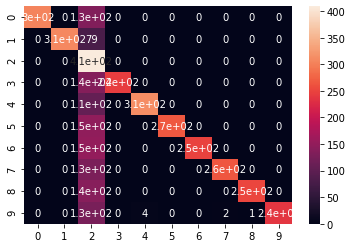

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True)


<AxesSubplot:>

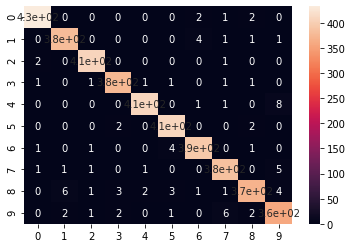

In [57]:
cm = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm,annot=True)


<AxesSubplot:>

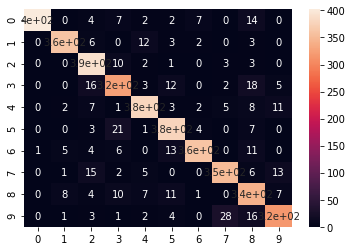

In [58]:
cm = confusion_matrix(y_test, pred_nb)
sns.heatmap(cm,annot=True)


In [59]:
model_names=["SVC","KNN","Naive_Bayes","CNN"]
model_accuracy=[0.711,0.978,0.900,0.995]



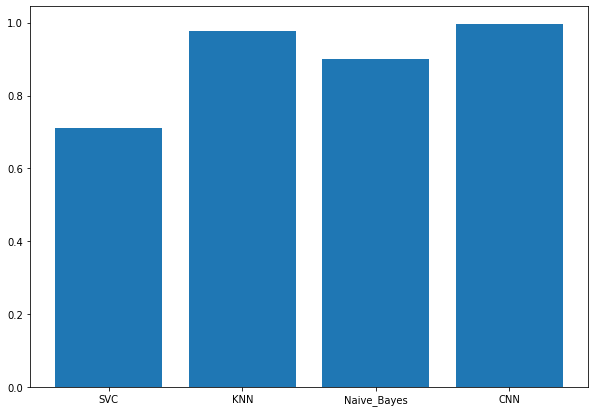

In [60]:
from matplotlib import pyplot as plt

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(model_names, model_accuracy)

# Show Plot
plt.show()
